<h1> Excersises 7 - GIS (QGIS) Programming - layers, projects, basic functionalities </h1>

Before we have talked about 4 bacis PyQGIS clasees, which we will be using:

<ul>
    <li>QgsProject - project class</li>
    <li>QgsVectorLayer - vector layerd class </li>
    <li>QgsRasterLayer - raster layer class </li>
    <li>iface - klasa interfejsu aplikacji </li>
</ul>

Let's begin with testing few functionalities of PyQGIS API:

We always start from importong core library:



In [13]:
from IPython.display import Image

In [ ]:
from qgis.core import *

After we can create an instance of opened project:

In [ ]:
projekt = QgsProject.instance()
projekt.fileName() # project name, now it is empty
sciezka = """C://path//to//file"""
projekt.write(sciezka) #save project
projekt.read(sciezka) #load project

<h3> Data Importing </h3>

How to import vector data - vector layer:

In [ ]:
vlayer = QgsVectorLayer("path_to_layer","Layer_name","ogr") #ogr is necessary to import vector layer

After this the layer will not be displayed. To display it, it has to be added to the map. To do that an iface class ought to be used.

iface is an interface class, it is a graphic interface of QGIS.

Iface is used to add layers and display them in one step:

In [ ]:
vlayer = iface.addVectorLayer("path_to_layer","Layer_name","ogr") #like that

Raster layers are imported similarly:

In [ ]:
import qgis.core
rlayer = QgsRasterLayer("path","Name")

OR

In [ ]:
iface.addRasterLayer("path","Name")

If we are working in QgsProject, we can add layers from memory (so when were imported but not displayed):

In [ ]:
QgsProject.instance().addMapLayer(rlayer) #add
QgsProject.instance().removeMapLayer(rlayer.id()) #remove
QgsProject.instance().mapLayers() #layers list

<h3>OS Library</h3>

This Python library is very useful for working with files - it allows for browsing through files and directories. For example, when you need to import many files at the same time it can be used to do that in one loop. 

Most useful commands are for iteration: $walk, join$

(you can run this part of the notebook to see what happens)

In [4]:
import os

In [5]:
dirr = """C:\GitHub\PwGIS\PwSGIS\Wyklady\Wyklad3""" #some path from your computer

In [15]:
ffile = "EMD.csv" #some file name

In [16]:
full = os.path.join(dirr,ffile) #returns full path (joined)
full

'C:\\GitHub\\PwGIS\\PwSGIS\\Wyklady\\Wyklad3\\EMD.csv'

In [8]:
os.path.basename(full) #file name

'EMD.csv'

In [9]:
os.path.abspath(full) #absolute path

'C:\\GitHub\\PwGIS\\PwSGIS\\Wyklady\\Wyklad3\\EMD.csv'

In [10]:
os.path.dirname(full) #directory path

'C:\\GitHub\\PwGIS\\PwSGIS\\Wyklady\\Wyklad3'

In [11]:
for root,directory,filename in os.walk(dirr):
    for ffile in filename:
        print(os.path.join(root,ffile))

In [ ]:
next(os.walk(dirr)) #only main folder

<h3>Using OS</h3>
On example of adding vector layer.
Pay attention to using "os" library

In [ ]:
import os
vlayer = QgsVectorLayer(os.path.join(wektor_folder,"Drogi_JG.shp"),"drogi","ogr") #loading data into QGIS os.path.join joins
#this does not add layer to map!
projekt = QgsProject.instance()
projekt.addMapLayer(vlayer) #this does

Or straight to map:

In [ ]:
iface.addVectorLayer(os.path.join(wektor_folder,"Budynki_JG.shp"),"drogi","ogr")

<h4>Layer metadata - raster </h4>

Acess to data, values, operations

<b>Basic properites:</b>

In [ ]:
rlayer.width() #number of pixels in width

rlayer.height() #number of pixels in height

rlayer.extent() #spatial extent

rlayer.extent().toString()
rlayer.rasterType() #0 = grey scale, 1 = (single band), 2 = Multiband

rlayer.isValid() 

rlayer.bandCount() #number of bands

rlayer.metadata() #all the metadata


Reading pixel values:

In [ ]:
ident = rlayer.dataProvider().identify(QgsPointXY(453138,81225), QgsRaster.IdentifyFormatValue)
ident.results()

A lot happened there. Let's take a close look on that: rlayer is our raster layer, dataProvider() calls a class giving access to layer's data (we will be using it in the future). This class have identify() method of a syntax:

identify(QgsPoint, format) - that is identify values at coordiantes given by QgsPoint(x,y) and return it in format QgsRaster.IdentifyFormatValue

Qgis uses own data types - here it is a QGIS point, this is why we used it to indentify cooridnates of a point.

<h4> Layer metadata - vector </h4>

Access to data, values, operations

(layers are added to the exercises directory - you can check these functions on your own)


In [ ]:
#Data load
#drogi = roads
#budynki = buildings
drogi = iface.addVectorLayer(os.path.join(directory,"Drogi_JG.shp"),"","ogr") #for directory put your own directory where you store data
budynki = iface.addVectorLayer(os.path.join(directory,"Budynki_JG.shp"),"drogi","ogr")

#First thing: browse through fields of a layer (attributes of objects of a layer)
for field in drogi.fields(): #fields return QgsField class - new class that stores attributes ofa layer - names and data types
	print(field.name(), field.typeName())


Quick hint: to work quicker (instead of reding layer from folder) we can assign currently selected layer under some variable

In [ ]:
layer = iface.activeLayer()

In [ ]:
#Getting features from layer
layer.getFeatures() #return iterator (not list), you can use it to iterate through objects of layer
features = [feature for feature in drogi.getFeatures()][:20] #selecting first 20 objects

Features are of a QgsFeatures class (new class here!). They have thier attributes and methods. Some of them are:

In [ ]:
for feat in features:
    print(feat.id()) #object id
    
for feat in features:
    print(feat.geometry()) #returns geometry of an object in a QgsGeometry class (new class here!)

for feat in features:
    print(feat.geometry().length()) #returns lenght of a geometry

for feat in features:
    print(feat['highway']) #return value of an attribute "highway" of an object


How to select objects on a layer?

In [ ]:
drogi.selectAll() #selects all objects

drogi.selectByExpression(""" "highway" = 'secondary' """) #selects objects by expression (all objects having highway attribute equal to secondary)

In [ ]:
iface.mapCanvas() #canvas layer - the layer of displayed map

drogi.selectAll()
iface.mapCanvas().setSelectionColor( QColor("magenta")) #changes color of selection to magenta

#OR in HEX RGB
iface.mapCanvas().setSelectionColor( QColor("#FFFF00")) #this is red

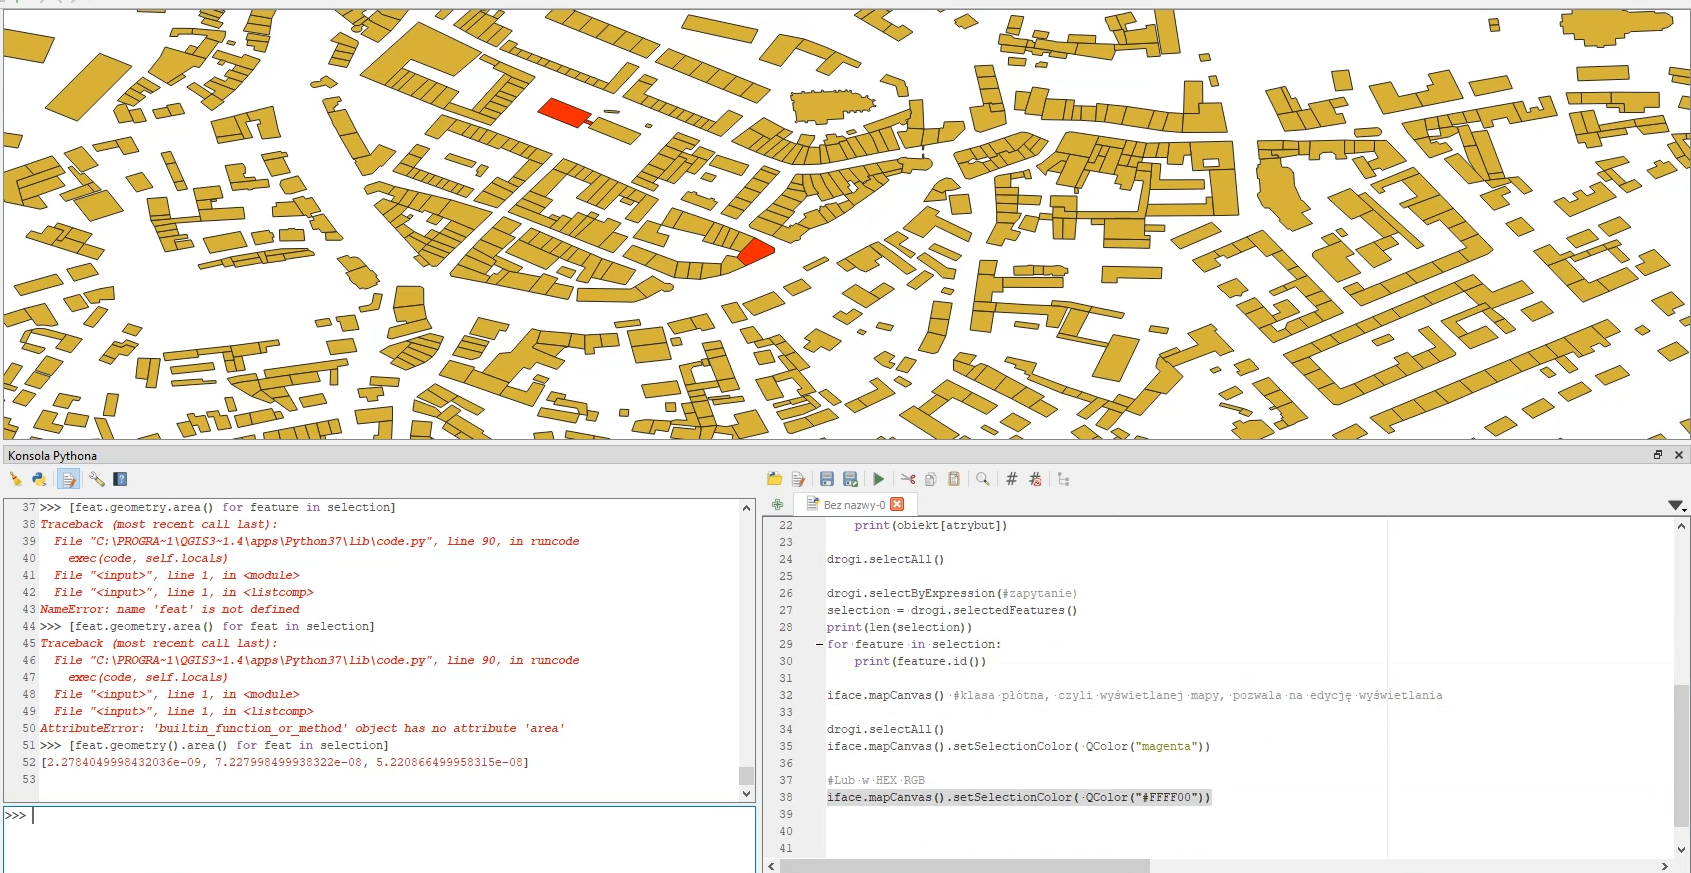

In [14]:
Image('1.png')

Iteration through selection

In [ ]:
drogi.selectByExpression(""" "highway" = 'secondary'""") #let's select all objects having "highway" attribute equal to secondary
selection = drogi.selectedFeatures() #selectedFeatures returns iterator of selected objects
for feature in selection: #for each object is selection
    print(feature.id()) #print its ID


<h3> That's all for today! </h3>